### 0. 폰트설치
- 그래프 작성 시 한글이 깨지는 증상이 있어 폰트 리스트를 미리 확인

In [ ]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmmi10',
 'STIXSizeOneSym',
 'cmtt10',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmr10',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXGeneral',
 'cmex10',
 'DejaVu Sans',
 'cmb10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmss10',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'Nirmala UI',
 'Segoe UI',
 'Microsoft YaHei',
 'HYGungSo-Bold',
 'Matura MT Script Capitals',
 'Vivaldi',
 'Lucida Sans Typewriter',
 'Gill Sans Ultra Bold Condensed',
 'HYHeadLine-Medium',
 'UnDotum',
 'Leelawadee UI',
 'Elephant',
 'Tw Cen MT',
 'Microsoft JhengHei',
 'Calisto MT',
 'Gulim',
 'Juice ITC',
 'Candara',
 'Franklin Gothic H

### 0. 패키지 불러오기
- 필요한 패키지를 미리 불러옴
- 사용할 한글 폰트를 설치하고 마이너스 기호 '-' 가 표시될 수 있도록 함

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. 검색어 데이터 불러오기
- 검색어는 구글trend를 통해 수집한 후 엑셀로 간단한 처리 후 사용함
- google trend가 제공하는 각 검색어의 관심도의 평균은 윤리적 소비: 16, 가치 소비: 18, 착한 소비: 8
- 가중치를 각각 윤리적 소비 : 가치 소비 : 착한 소비 : = 1.6 : 1.8 : 0.8 로 설정함
- 가중치를 곱해준 후 모두 더하여 총 검색량의 합계 열을 생성

In [ ]:
trend = pd.read_csv('C:/Users/chaiw/Desktop/경진대회/분석용데이터/trend_0.csv',encoding='cp949',usecols=[0,4,5,6,7])
trend.head()

,주,윤리적 소비(w:1.6),가치 소비(w:1.8),착한 소비(w:0.8),총검색량 합계
0,2018-12-30,49.6,27.0,0.0,76.6
1,2019-01-06,0.0,34.2,0.0,34.2
2,2019-01-13,0.0,52.2,0.0,52.2
3,2019-01-20,36.8,0.0,0.0,36.8
4,2019-01-27,0.0,0.0,0.0,0.0


### 2. 분석 전 데이터 구조 확인

In [ ]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   주              260 non-null    object 
 1   윤리적 소비(w:1.6)  260 non-null    float64
 2   가치 소비(w:1.8)   260 non-null    float64
 3   착한 소비(w:0.8)   260 non-null    float64
 4   총검색량 합계        260 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.3+ KB


In [ ]:
trend.isnull().sum()

주                0
윤리적 소비(w:1.6)    0
가치 소비(w:1.8)     0
착한 소비(w:0.8)     0
총검색량 합계          0
dtype: int64

### 3. 요약통계량 및 분포
- 2018년 12월 30일부터 2023년 12월 17일까지 매 주(일~토)까지의 검색 관심도에 대한 데이터, 총 260주의 데이터를 사용
- 총 검색 관심도의 평균은 58.78
- 총 검색 관심도의 최소값은 0
- 총 검색 관심도의 최대값은 232.8
- 분포를 확인해 보았을 때 오른쪽으로 긴 꼬리를 가지고 있음, 해당 기간 동안 총 검색 관심도가 작았던 경우가 많음을 알 수 있음

In [ ]:
trend.describe()

,윤리적 소비(w:1.6),가치 소비(w:1.8),착한 소비(w:0.8),총검색량 합계
count,260.000000,260.000000,260.000000,260.000000
mean,19.821538,27.173077,5.033846,52.028462
std,20.850966,21.716269,8.387199,33.344760
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.750000,0.000000,28.800000
50%,19.200000,27.000000,0.000000,51.300000
75%,32.400000,39.600000,8.800000,72.150000
max,113.600000,126.000000,80.000000,203.600000


(array([47., 51., 71., 50., 26.,  7.,  4.,  3.,  0.,  1.]),
 array([  0.  ,  20.36,  40.72,  61.08,  81.44, 101.8 , 122.16, 142.52,
        162.88, 183.24, 203.6 ]),
 <BarContainer object of 10 artists>)

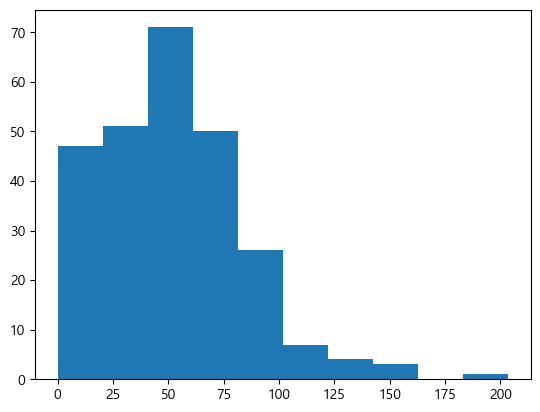

In [ ]:
plt.hist(trend['총검색량 합계'],bins=10)

### 4. 총검색량의 추이 살펴보기

Text(0, 0.5, '검색빈도')

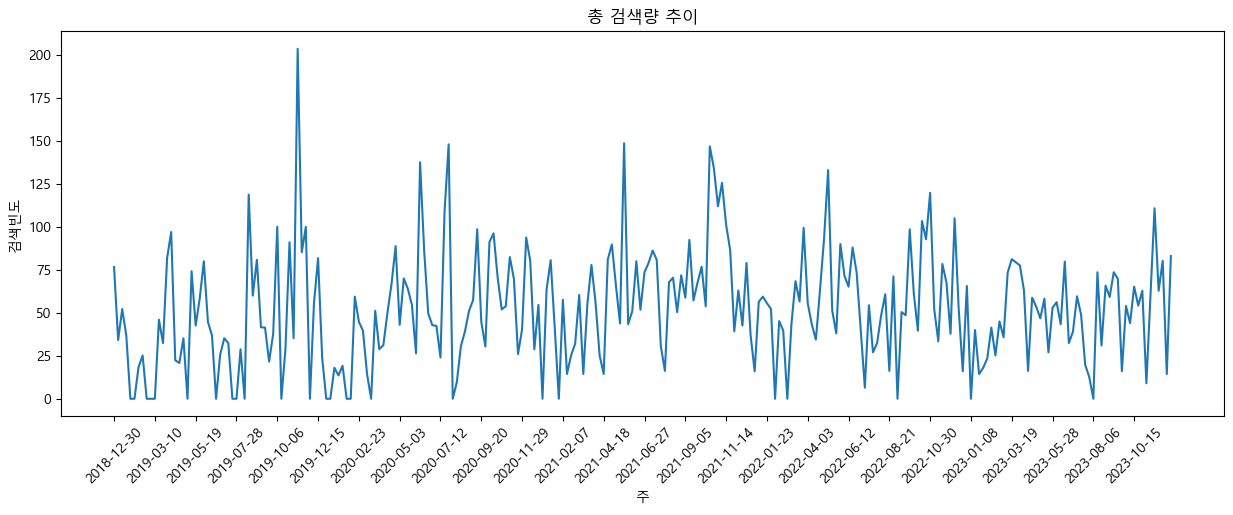

In [ ]:
x = trend["주"]
y = trend["총검색량 합계"]
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks(ticks=x,rotation=45)
plt.locator_params(axis='x', nbins=len(x)/10)
plt.title('총 검색량 추이')
plt.xlabel('주')
plt.ylabel('검색빈도')

### 5. 눈에 띄게 검색빈도가 많았던 부분이 존재하므로 해당하는 주를 탐색함
- 2019년 11월 10일 ~ 2019년 11월 16일에 해당하는 주에 가치소비에 대한 관심이 많았던 것으로 확인할 수 있었음

In [ ]:
trend.sort_values('총검색량 합계',ascending=False).head(5)

,주,윤리적 소비(w:1.6),가치 소비(w:1.8),착한 소비(w:0.8),총검색량 합계
45,2019-11-10,113.6,54.0,36.0,203.6
125,2021-05-23,57.6,84.6,6.4,148.6
82,2020-07-26,32.0,36.0,80.0,148.0
146,2021-10-17,20.8,126.0,0.0,146.8
75,2020-06-07,40.0,79.2,18.4,137.6


Text(50, 200, '2019-11-10 ~ 2019-11-16')

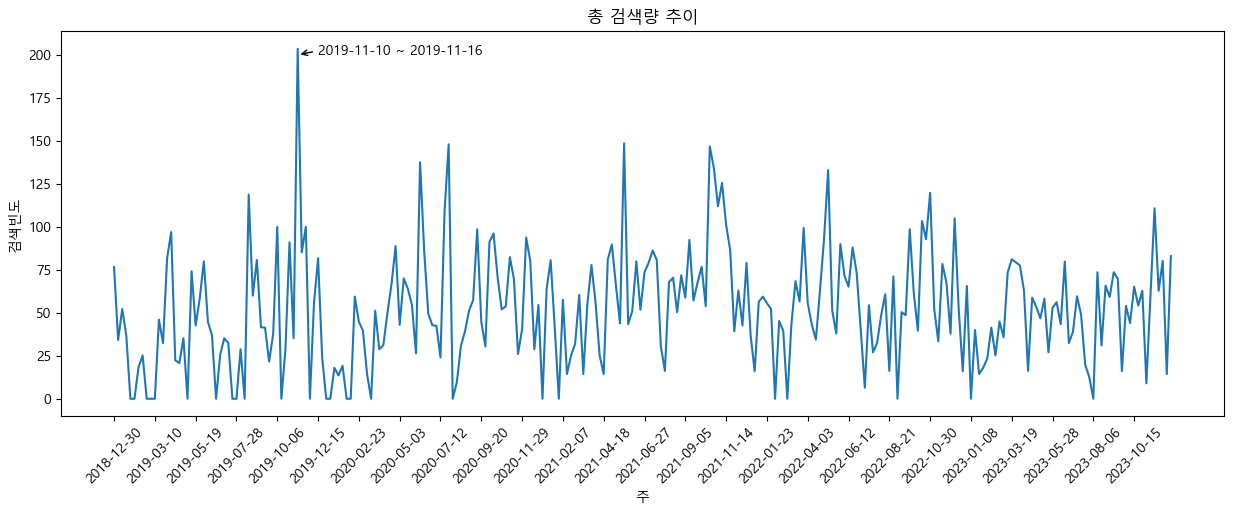

In [ ]:
x = trend["주"]
y = trend["총검색량 합계"]
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks(ticks=x,rotation=45)
plt.locator_params(axis='x', nbins=len(x)/10)
plt.title('총 검색량 추이')
plt.xlabel('주')
plt.ylabel('검색빈도')
plt.annotate('2019-11-10 ~ 2019-11-16',xy=(45,200),xytext=(50,200), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.1'))

### 6. 각 검색어 별 연관검색어를 모은 파일을 불러오고 상위 8개 연관검색어 확인
- 검색어별로 연관검색어를 탐색했을 때, 같은 연관 검색어가 존재할 경우 단순합으로 처리함
- 어떤 연관검색어가 있는지 확인하기 위함
- 상위 10개를 우선 선정하였지만, 연관검색어 중 윤리적 소비, 가치 소비가 포함되어 해당 열은 제외하고 8개의 연관검색어만 활용

In [ ]:
search_top = pd.read_csv('C:/Users/chaiw/Desktop/경진대회/분석용데이터/top_1.csv')
search_top.head(8)

,검색어,인기도
0,윤리적 소비 사례,116.0
1,공정 무역 상품,106.0
2,착한 소비 사례,106.0
3,소비 트렌드,100.0
4,mz 세대,86.0
5,친환경 소비,74.0
6,esg,43.0
7,사회적 가치,42.0


### 7. 상위 8개의 연관 검색어의 260주 데이터를 불러오고 구조, 통계량 확인
- 2018년 12월 30일부터 2023년 12월 17일까지 매 주(일~토)까지의 검색 관심도에 대한 데이터, 총 260주의 데이터를 사용
- 소비 트렌드, esg, 사회적가치, mz세대의 총 검색 관심도의 평균이 높은 편으로 확인 됨

In [ ]:
sub_search = pd.read_csv('C:/Users/chaiw/Desktop/경진대회/분석용데이터/sub_search_1.csv')
sub_search.head()

,주,윤리적 소비 사례,공정 무역 상품,착한 소비 사례,소비 트렌드,mz 세대,친환경 소비,esg,사회적 가치
0,2018-12-30,0,0,0,28,0,33,2,31
1,2019-01-06,0,0,0,51,0,23,3,69
2,2019-01-13,0,0,91,35,0,0,0,48
3,2019-01-20,0,54,0,32,0,38,3,34
4,2019-01-27,0,0,0,41,0,0,6,0


In [ ]:
sub_search.describe()

,윤리적 소비 사례,공정 무역 상품,착한 소비 사례,소비 트렌드,mz 세대,친환경 소비,esg,사회적 가치
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,12.057692,9.680769,4.292308,42.461538,34.642308,14.738462,44.596154,41.203846
std,21.272649,21.711206,13.160985,22.010932,29.619579,20.018545,34.009912,18.229786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,28.750000,4.000000,0.000000,5.000000,29.000000
50%,0.000000,0.000000,0.000000,42.000000,30.500000,0.000000,57.500000,40.000000
75%,22.250000,0.000000,0.000000,56.500000,62.000000,26.000000,74.000000,52.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
sub_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   주          260 non-null    object
 1   윤리적 소비 사례  260 non-null    int64 
 2   공정 무역 상품   260 non-null    int64 
 3   착한 소비 사례   260 non-null    int64 
 4   소비 트렌드     260 non-null    int64 
 5   mz 세대      260 non-null    int64 
 6   친환경 소비     260 non-null    int64 
 7   esg        260 non-null    int64 
 8   사회적 가치     260 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 18.4+ KB


In [ ]:
sub_search.isnull().sum()

주            0
윤리적 소비 사례    0
공정 무역 상품     0
착한 소비 사례     0
소비 트렌드       0
mz 세대        0
친환경 소비       0
esg          0
사회적 가치       0
dtype: int64

### 8. 각 연관검색어 별 추이를 살펴보는 그래프
- 앞서 요약통계량에서 소비 트렌드, esg, 사회적 가치, mz 세대의 총 검색 관심도의 평균이 높은 편으로 확인 됨
- 한편 시간의 흐름에 따른 그래프를 그려본 결과 소비 트렌드, mz 세대, esg, 사회적 가치에서 패턴이 있을 것으로 예상함

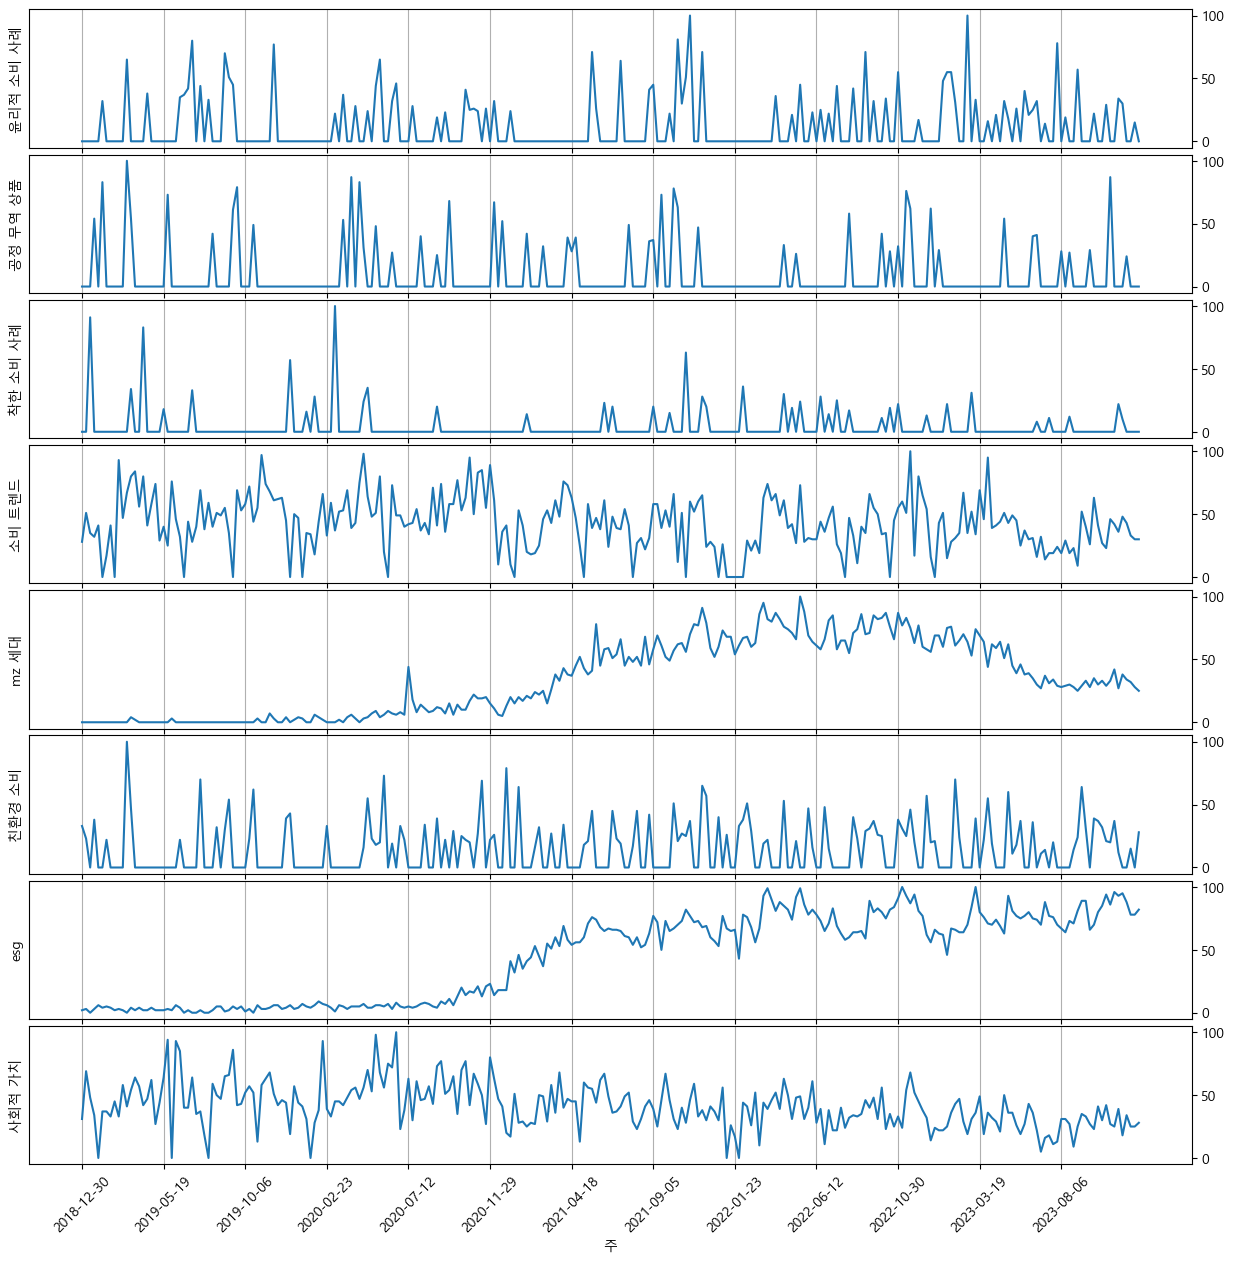

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.05)

for i in range(7):
    plt.subplot(8,1,i+1)
    plt.plot(sub_search["주"],sub_search.iloc[:,i+1])
    plt.ylabel(sub_search.columns[i+1])
    plt.xticks(ticks=x,rotation=0)
    plt.grid(axis='x')
    plt.locator_params(axis='x', nbins=len(x)/20)
    plt.gca().yaxis.tick_right()

plt.subplot(8,1,8)
plt.plot(sub_search["주"],sub_search.iloc[:,8])
plt.xlabel('주')
plt.ylabel(sub_search.columns[8])
plt.xticks(ticks=x,rotation=45)
plt.grid(axis='x')
plt.locator_params(axis='x', nbins=len(x)/20)
plt.gca().yaxis.tick_right()

### 9. 시계열 분석
- 소비 트렌드, mz 세대, esg, 사회적 가치에서 패턴이 있을 것으로 예상하고 시계열 분해를 진행함
- 시계열을 구성하는 각 성분이 덧셈으로 연결되어 있다고 가정하고 진행

In [ ]:
sub1=sub_search.loc[:,['주','소비 트렌드','mz 세대','esg','사회적 가치']]
sub1['주']=pd.to_datetime(sub1['주'])
sub1.set_index('주', inplace=True)
sub1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2018-12-30 to 2023-12-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   소비 트렌드  260 non-null    int64
 1   mz 세대   260 non-null    int64
 2   esg     260 non-null    int64
 3   사회적 가치  260 non-null    int64
dtypes: int64(4)
memory usage: 10.2 KB


### 9-1. 시계열 분해 - 소비 트렌드
- 소비 트렌드의 경우 시간이 흐름에 따라 감소하다가 2020년 7월 쯤 소폭 증가 후 감소하는 추세를 보여주었음
- 1년마다 M자 형태의 계절적 주기를 보여줌

<Figure size 1500x1500 with 0 Axes>

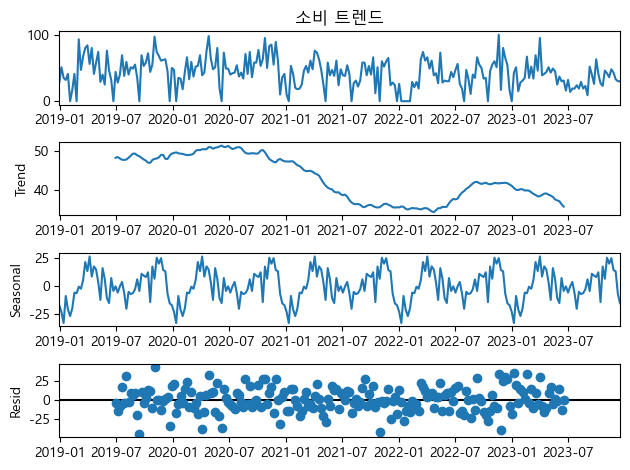

In [ ]:
plt.figure(figsize=(15,15))

from statsmodels.tsa.seasonal import seasonal_decompose

result1 = seasonal_decompose(sub1['소비 트렌드'], model='Additive')
result1.plot()
plt.show()

### 9-2. 시계열 분해 - mz 세대
- mz 세대의 경우 2022년 7월까지 꾸준히 증가하다가 살짝 감소하는 추세
- 1년을 주기로 7월에는 증가, 1월에는 감소 하는 계절적 주기를 보여줌

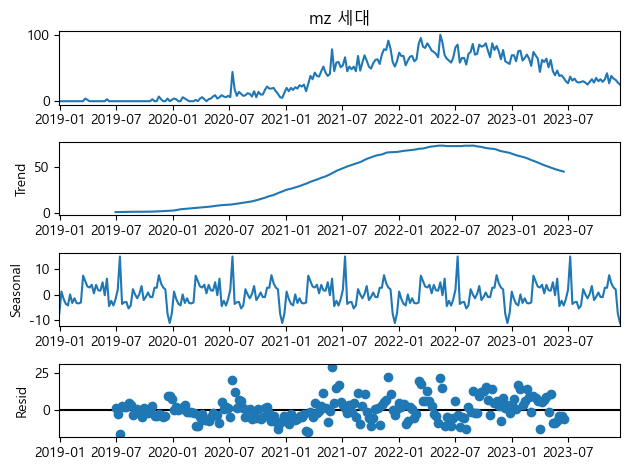

In [ ]:
result3 = seasonal_decompose(sub1['mz 세대'], model='Additive')
result3.plot()
plt.show()

### 9-3. 시계열 분해 - 사회적 가치
- 사회적 가치의 경우 2020년 7월이후로 꾸준히 감소하는 추세
- 1년을 주기로 비슷한 패턴을 보여주었음

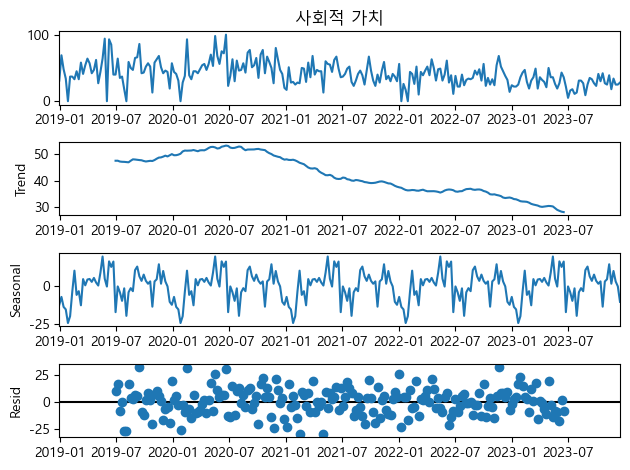

In [ ]:
result5 = seasonal_decompose(sub1['사회적 가치'], model='Additive')
result5.plot()
plt.show()

### 9-4. 시계열 분해 - esg
- esg의 경우 2020년 7월 이후로 꾸준히 증가하여 2022년 부터는 비슷한 수준 유지
- 1년을 주기로 비슷한 패턴을 보여주었음

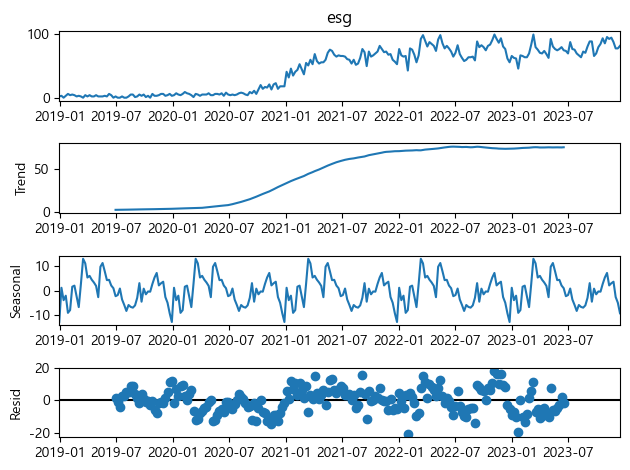

In [ ]:
result6 = seasonal_decompose(sub1['esg'], model='Additive')
result6.plot()
plt.show()

### 10. 연관검색어들 사이의 상관관계를 클러스터맵을 작성
- esg와 mz세대의 경우 0.86으로 높은 상관관계를 보여주었음
- 사회적 가치와 소비 트렌드의 상관계수는 0.3
- 사회적가치와 esg의 상관계수는 -0.35, 사회적 가치와 mz세대의 상관계수는 -0.27로 음의 상관관계를 보여주었음
- 사회적 가치와 mz세대는 음의 상관 관계인 한편, esg와 mz세대는 양의 상관 관계로 보여짐

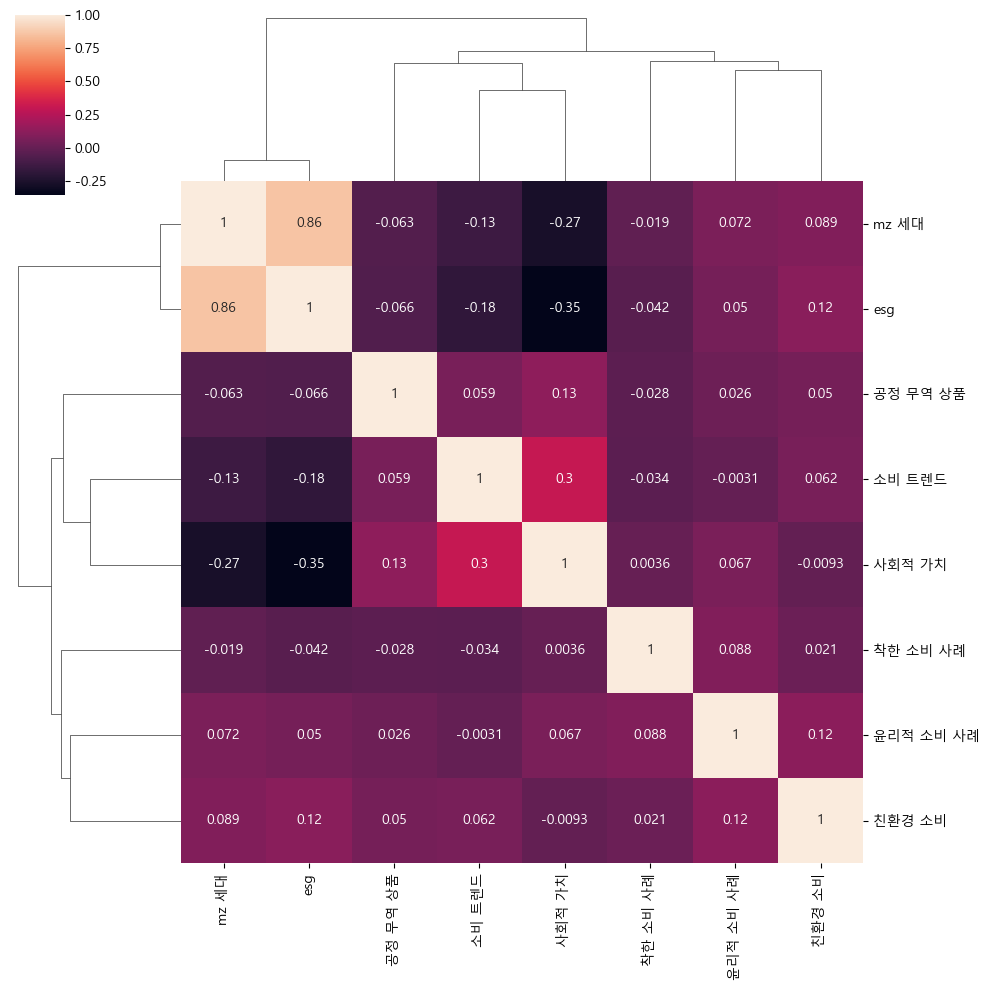

In [ ]:
sns.clustermap(sub_search.corr(), annot=True)

### 11. 선형관계를 확인해보고자 산점도를 작성
- 소비트렌드와 사회적 가치, esg와 mz세대에서는 선형관계를 발견할 수 있었음

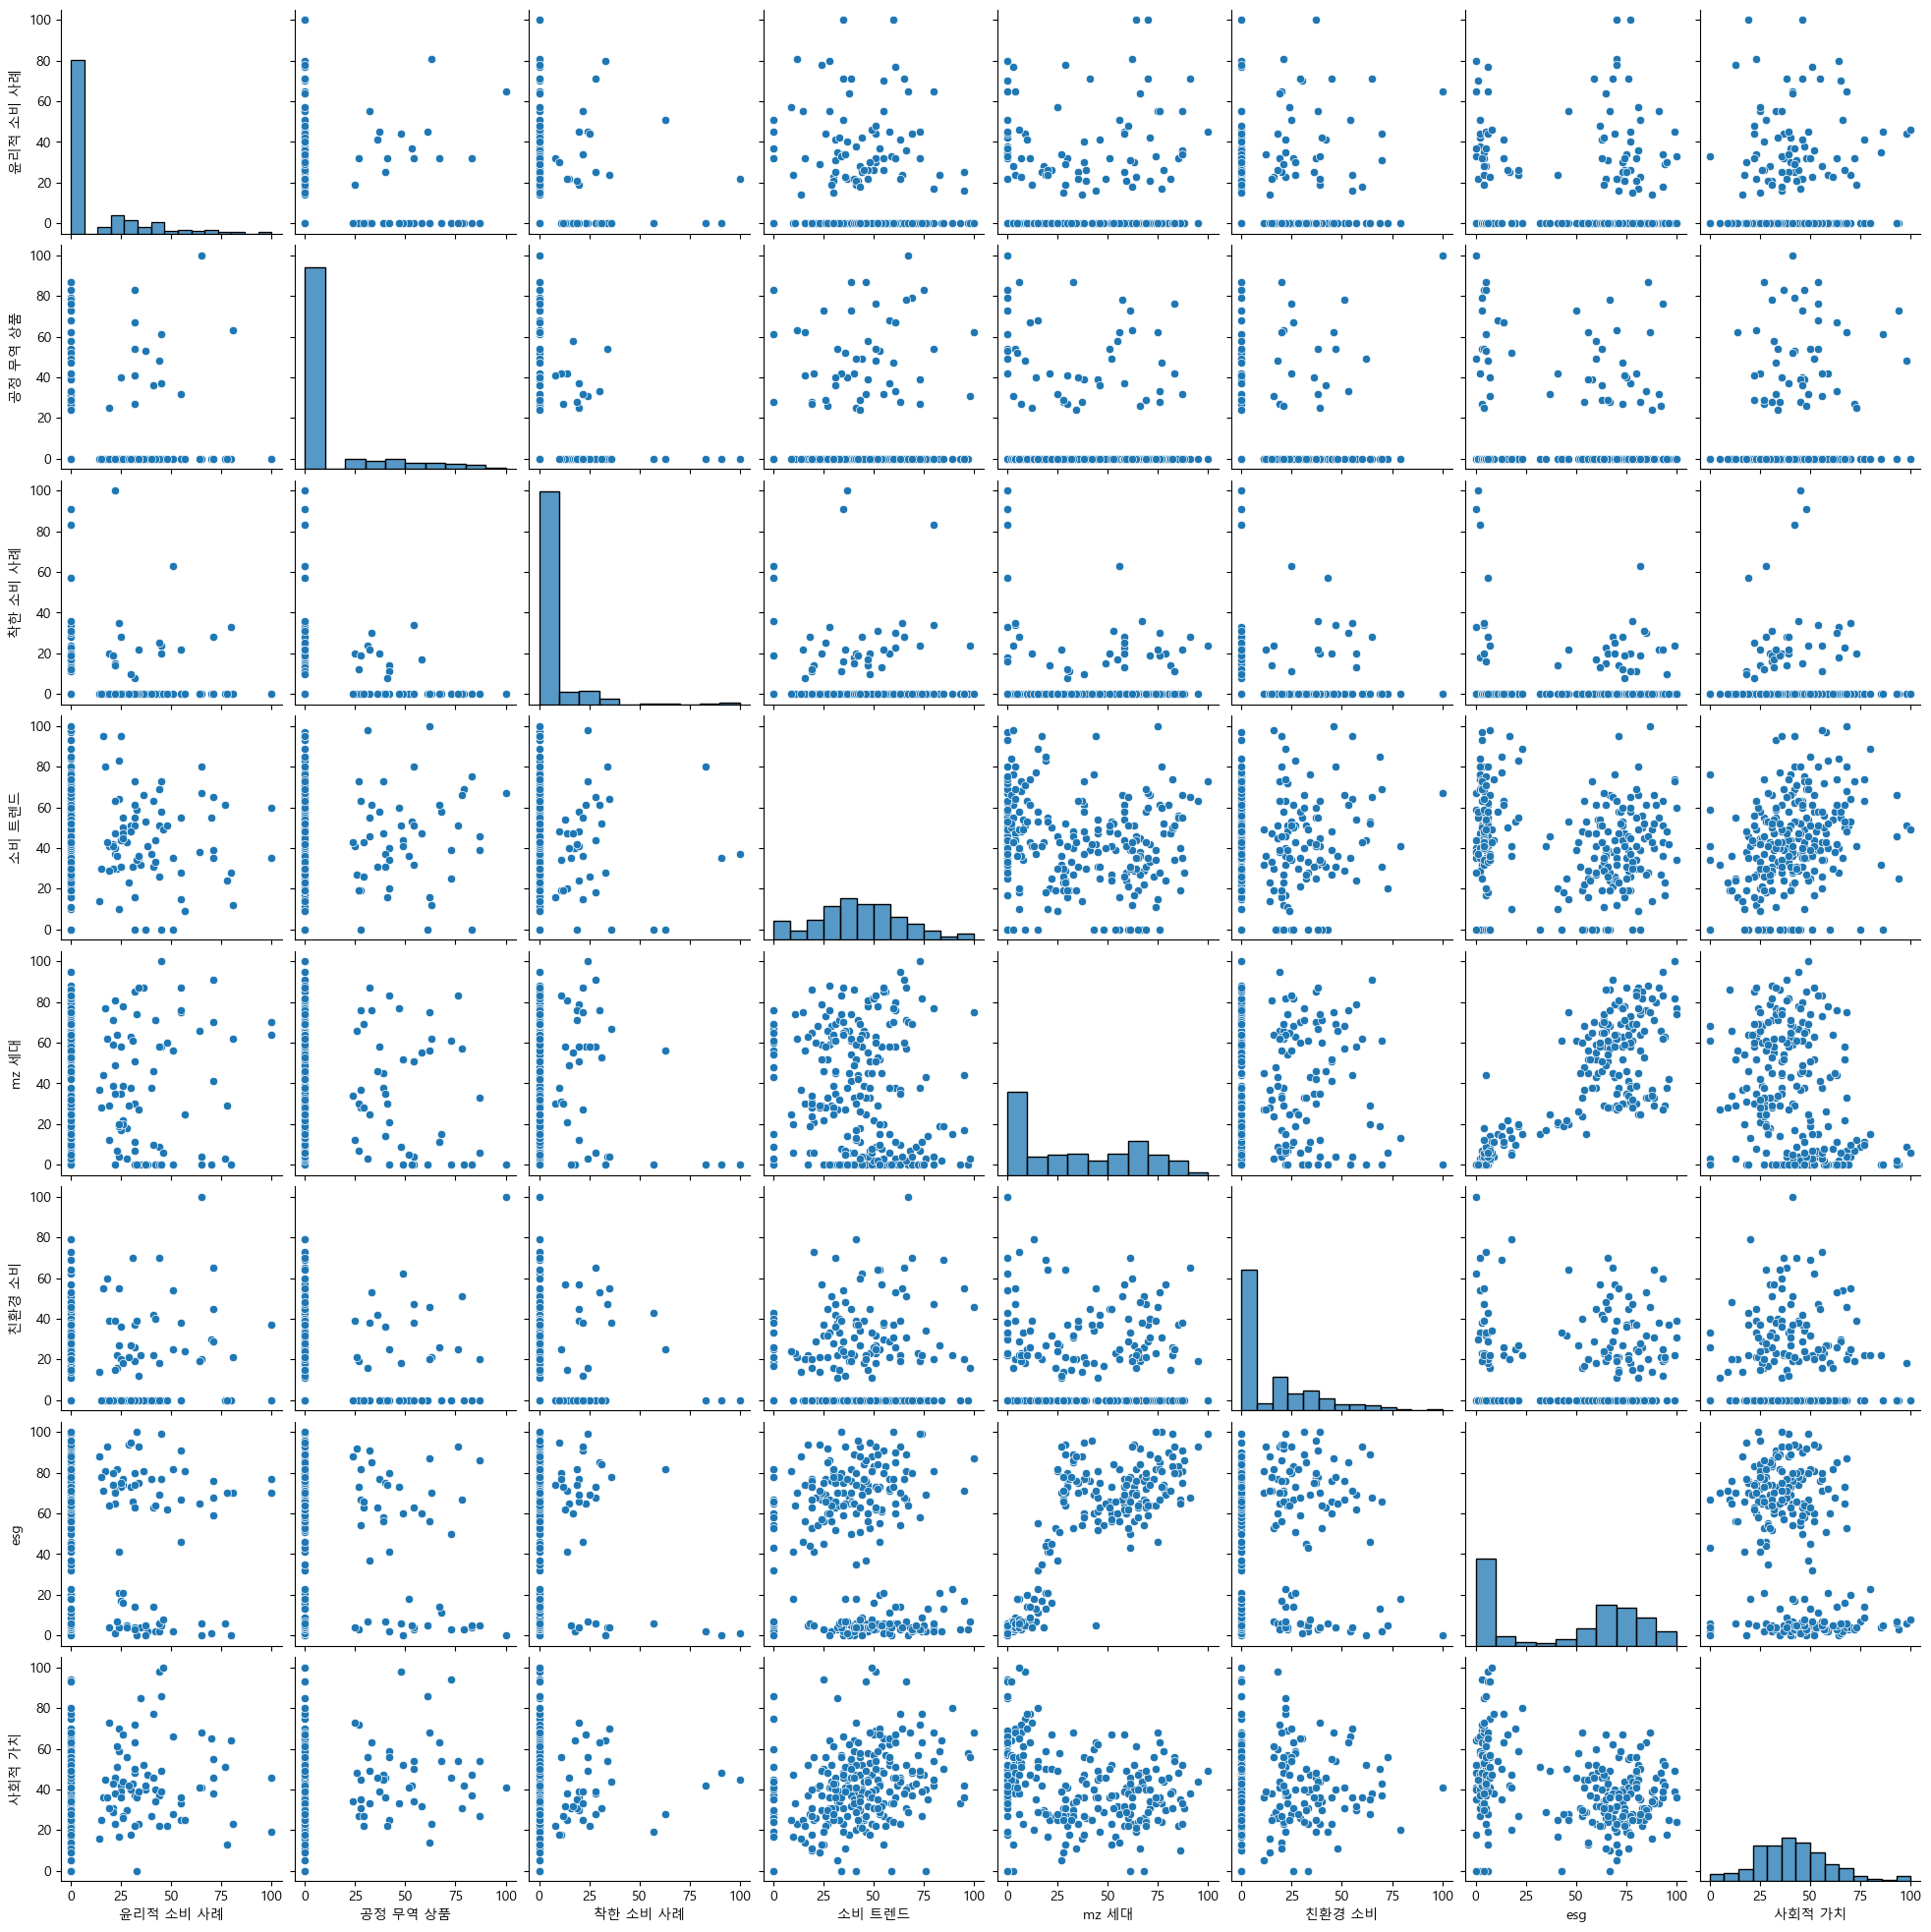

In [ ]:
sns.pairplot(sub_search)

### 12. 연관검색어들을 이용하여 주성분 분석을 진행함
- 진행 전 표준화 처리를 해주었음
- 스크리 그림을 그래프를 통해 확인해 본 결과, 주성분이 1개 이상일 때 설명력이 감소함

In [ ]:
sub_search2 = sub_search.iloc[:,1:9]
sub_search2.head()

,윤리적 소비 사례,공정 무역 상품,착한 소비 사례,소비 트렌드,mz 세대,친환경 소비,esg,사회적 가치
0,0,0,0,28,0,33,2,31
1,0,0,0,51,0,23,3,69
2,0,0,91,35,0,0,0,48
3,0,54,0,32,0,38,3,34
4,0,0,0,41,0,0,6,0


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=len(sub_search2.columns)) # 생성할 주성분의 개수
pca.fit(sub_search2)

PCA(n_components=8)

In [ ]:
pca.explained_variance_
np.sqrt(pca.explained_variance_)

array([44.34777582, 23.62964884, 21.47990924, 21.17455389, 19.14862292,
       15.58062309, 13.08113832, 11.54469623])

In [ ]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler().fit_transform(sub_search2) # 표준화
z2=pd.DataFrame(z)

pca2=PCA(n_components=len(z2.columns)) # 표준화 후 생성할 주성분의 개수
pca2.fit(z2)

pca2.explained_variance_
np.sqrt(pca2.explained_variance_) # 표준화 후 각 주성분이 설명할 수 있는 분산

array([1.47559901, 1.12035985, 1.04537238, 0.97735796, 0.94508643,
       0.93561547, 0.80315985, 0.36963092])

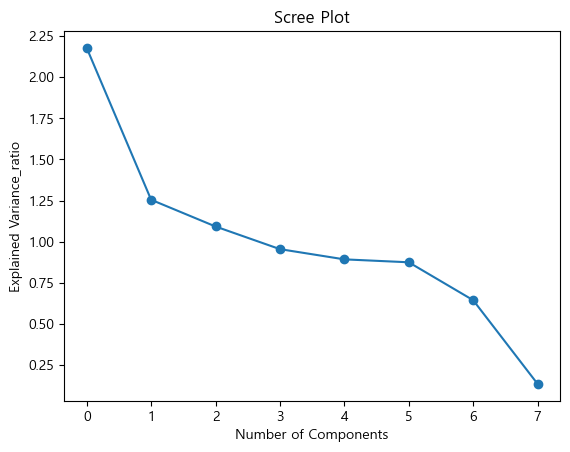

In [ ]:
plt.plot(pca2.explained_variance_, 'o-') # 스크리그림
plt.title("Scree Plot")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance_ratio')
plt.show()

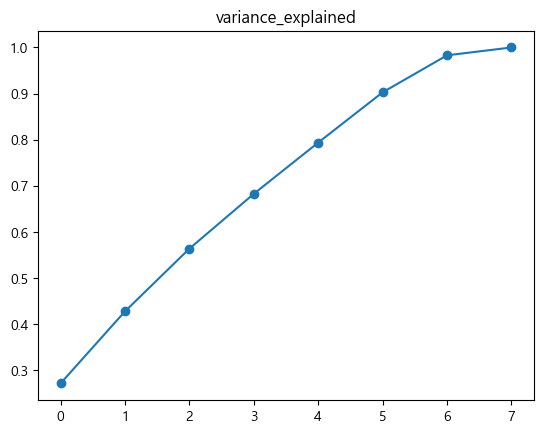

In [ ]:
plt.plot(pca2.explained_variance_ratio_.cumsum(), 'o-') # 누적분산그림
plt.title("variance_explained")
plt.show()

### 12-1. 주성분 1개일 때
- 스크리 그림을 통해 확인해 본 결과, 주성분이 1개일 때, 설명력이 감소
- 한편 주성분을 1개로 할 경우 첫 번째 주성분이 약 27%, 두 번째 주성분이 약 15%를 설명하여 두개의 주성분이 전체 모델을 42%밖에 설명하지 못하게 됨

In [ ]:
pca2.explained_variance_ratio_ # 주성분 분산 비율

array([0.27112723, 0.15629731, 0.13607504, 0.11894433, 0.11121913,
       0.10900118, 0.08032309, 0.01701269])

In [ ]:
pca3=PCA(n_components=1)
pca3.fit(z2)
np.round(pca3.components_,1) # 계수

array([[-0. ,  0.1,  0. ,  0.3, -0.6, -0.1, -0.6,  0.4]])

### 12-2. 주성분 6개일 때
- 스크리 그림을 통해 확인해 본 결과, 주성분이 1개일 때, 설명력이 감소
- 한편 주성분을 6개로 할 경우 90%의 설명력을 가지게 됨

In [ ]:
pca4=PCA(n_components=6)
pca4.fit(z2)
np.round(pca4.components_,6) # 계수

array([[-0.046595,  0.120054,  0.017399,  0.267926, -0.595073, -0.0951  ,
        -0.619445,  0.405538],
       [ 0.503017,  0.333897,  0.094842,  0.39339 ,  0.195008,  0.542814,
         0.151964,  0.34054 ],
       [ 0.435483, -0.267626,  0.751312, -0.334639, -0.151048,  0.045188,
        -0.150034, -0.122106],
       [ 0.044806,  0.840167, -0.00381 , -0.504946, -0.096431, -0.047351,
        -0.056989, -0.149459],
       [-0.031944, -0.206661, -0.355863, -0.247508, -0.284618,  0.746096,
        -0.195092, -0.304375],
       [-0.707777,  0.175582,  0.546919,  0.210574,  0.034036,  0.334899,
         0.046528, -0.096335]])